In [ ]:
import pandas as pd

df = pd.read_csv("usa_oilandgas_production.csv", sep = '\t')
df.head()

,Unnamed: 0,Production Date,Land Class,Land Category,State,County,FIPS Code,Offshore Region,Commodity,Disposition Code,Disposition Description,Volume
0,0,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Alaska,Gas (Mcf),1,Sales-Royalty Due-MEASURED,0
1,1,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Gulf,Gas (Mcf),1,Sales-Royalty Due-MEASURED,14508756
2,2,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Pacific,Gas (Mcf),1,Sales-Royalty Due-MEASURED,1207520
3,3,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Gulf,Gas (Mcf),4,Sales-Royalty Due-Not Measured,487324
4,4,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Pacific,Gas (Mcf),4,Sales-Royalty Due-Not Measured,114808


In [3]:
df.columns

Index(['Unnamed: 0', 'Production Date', 'Land Class', 'Land Category', 'State',
       'County', 'FIPS Code', 'Offshore Region', 'Commodity',
       'Disposition Code', 'Disposition Description', 'Volume'],
      dtype='object')

In [4]:
# Convert 'Production Date' to datetime format
df['Production Date'] = pd.to_datetime(df['Production Date'])

## 1. How many unique counties are there?

In [5]:
# 1. How many unique counties are there?
unique_counties = df['County'].nunique()
print("Unique counties:", unique_counties)

Unique counties: 319


## 2. Which county is most productive?

In [6]:
# 2. Which county is most productive?
county_production = df.groupby('County')['Volume'].sum().sort_values(ascending=False)
most_productive_county = county_production.index[0]
print(f"\n2. Most productive county: {most_productive_county}")
print(f"   Volume: {county_production.iloc[0]:,}")


2. Most productive county: Offshore
   Volume: 21,182,236,386


## 3. How many states are there?

In [11]:
# 3. How many states are there?
unique_states = df['State'].nunique()
print("Unique states:", unique_states)

Unique states: 28


## 4. What are the top 5 states by volume?

In [12]:
# 4. What are the top 5 states by volume?
# Question 4: Top 5 states by volume
state_production = df.groupby('State')['Volume'].sum().sort_values(ascending=False)
print(f"\n4. Top 5 states by volume (all years):")
for i, (state, volume) in enumerate(state_production.head().items(), 1):
    print(f"   {i}. {state}: {volume:,}")


4. Top 5 states by volume (all years):
   1. Offshore: 21,182,236,386
   2. NM: 16,918,717,269
   3. WY: 13,262,488,622
   4. CO: 6,121,273,504
   5. UT: 1,870,280,368


In [7]:
# Format large numbers to be more readable
def format_large_number(num):
    if num >= 1_000_000_000:
        return f'{num / 1_000_000_000:.1f}B'
    elif num >= 1_000_000:
        return f'{num / 1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num / 1_000:.1f}K'
    else:
        return f'{num:,}'


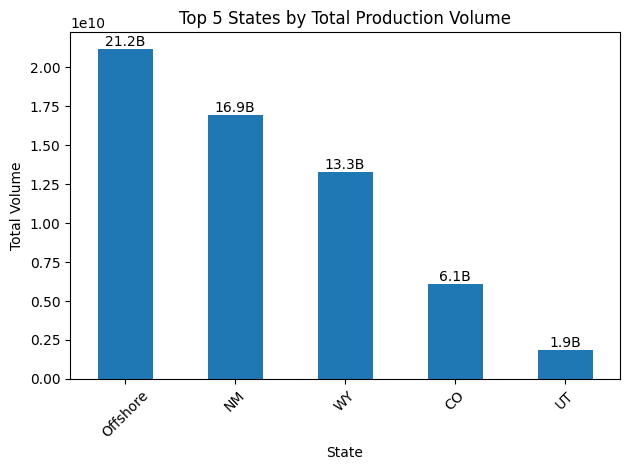

In [ ]:
# (number 4 plot graph): Top 5 States by Total Volume 

import matplotlib.pyplot as plt

top_states = state_production.head(5)

ax = top_states.plot(kind='bar', rot=45)  # rot=45 rotates x labels

ax.set_ylabel('Total Volume')
ax.set_title('Top 5 States by Total Production Volume')

# Add formatted value labels on top of bars
for i, value in enumerate(top_states.values):
    ax.text(i, value, format_large_number(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## 5. What are the top 5 states by volume in 2017?

In [14]:
# 5. What are the top 5 states by volume in 2017?
df['Year'] = df['Production Date'].dt.year
df_2017 = df[df['Year'] == 2017]
if not df_2017.empty:
    state_production_2017 = df_2017.groupby('State')['Volume'].sum().sort_values(ascending=False)
    print(f"\n5. Top 5 states by volume in 2017:")
    for i, (state, volume) in enumerate(state_production_2017.head().items(), 1):
        print(f"   {i}. {state}: {volume:,}")
else:
    print("\n5. No data available for 2017")


5. Top 5 states by volume in 2017:
   1. Offshore: 2,128,441,147
   2. WY: 1,445,442,618
   3. NM: 889,068,131
   4. CO: 657,397,303
   5. UT: 199,563,568


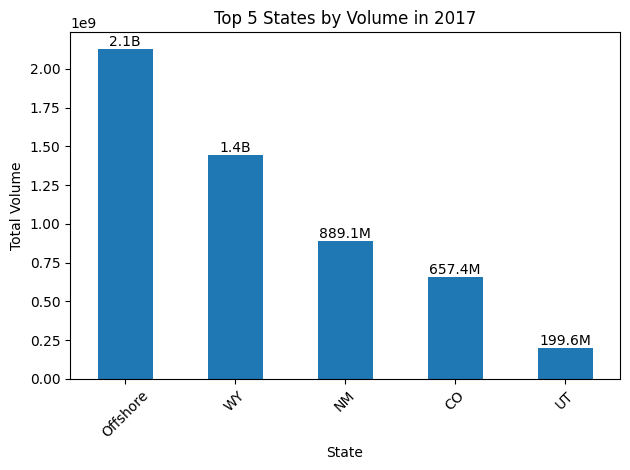

In [ ]:
#(number 5 plot graph): What are the top 5 states by volume in 2017?

# Group by state and sum the volume
state_volume_2017 = df_2017.groupby('State')['Volume'].sum()

# Sort the states by volume in descending order
top_5_states = state_volume_2017.sort_values(ascending=False).head(5)

# Plot the result using pandas plot and get the Axes object
ax = top_5_states.plot(kind='bar', rot=45)

# Set labels and title via the Axes object
ax.set_title('Top 5 States by Volume in 2017')
ax.set_xlabel('State')
ax.set_ylabel('Total Volume')

# Add formatted value labels on top of bars
for i, value in enumerate(top_5_states.values):
    ax.text(i, value, format_large_number(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## 6. Please list out all years and the most productive state for each year

In [12]:
# 6. Please list out all years and the most productive state for each year
yearly_state_production = df.groupby(['Year', 'State'])['Volume'].sum().reset_index()
most_productive_by_year = yearly_state_production.loc[
    yearly_state_production.groupby('Year')['Volume'].idxmax()
]
print(f"\n6. Most productive state by year:")
for _, row in most_productive_by_year.iterrows():
    print(f"   {int(row['Year'])}: {row['State']} ({row['Volume']:,})")


6. Most productive state by year:
   2015: Offshore (2,300,026,701)
   2016: Offshore (2,225,650,113)
   2017: Offshore (2,128,441,147)
   2018: Offshore (2,138,419,129)
   2019: Offshore (2,276,316,766)
   2020: Offshore (1,922,790,237)
   2021: Offshore (1,908,724,865)
   2022: NM (2,143,159,295)
   2023: NM (2,516,660,961)
   2024: NM (2,926,038,279)
   2025: NM (1,256,345,879)


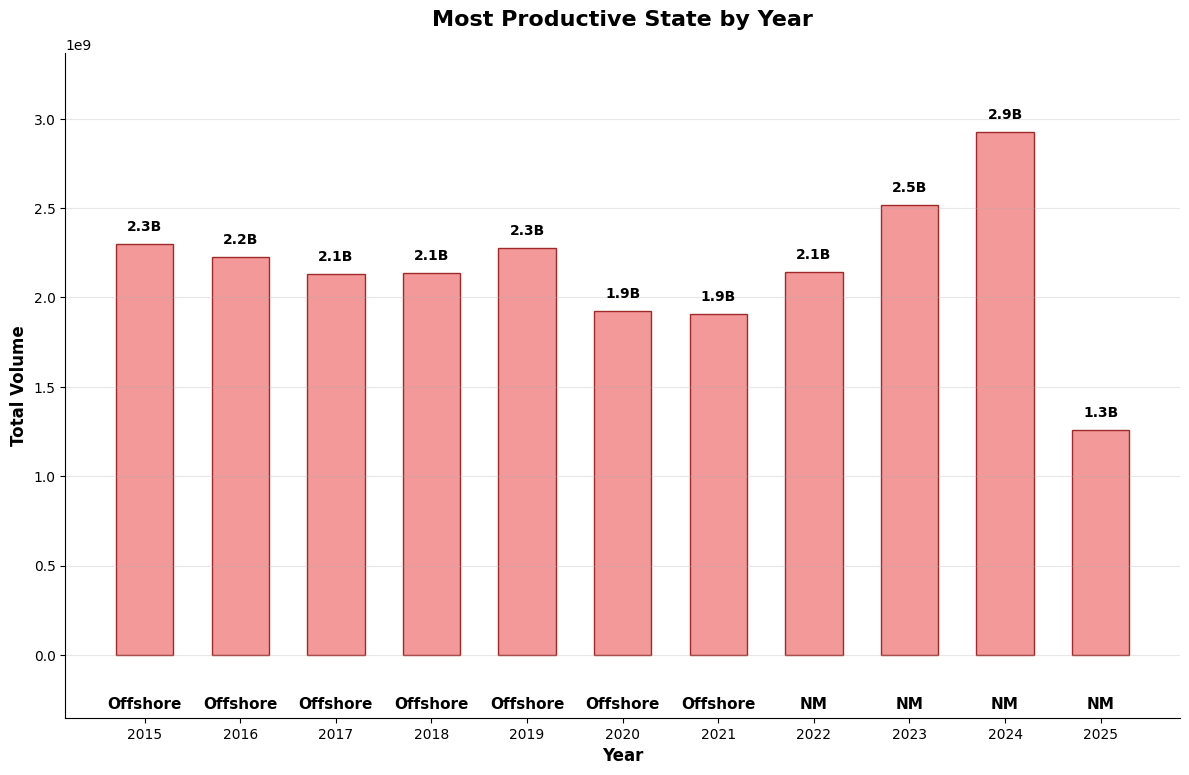

In [ ]:
#(number 6 plot graph): Please list out all years and the most productive state for each year

# Group by Year and State, then sum the Volume
yearly_production = df.groupby(['Year', 'State'])['Volume'].sum().reset_index()

# Find the most productive state for each year
most_productive = yearly_production.loc[yearly_production.groupby('Year')['Volume'].idxmax()]

# Create the plot
plt.figure(figsize=(12, 8))

# Bar plot
bars = plt.bar(most_productive['Year'].astype(str), most_productive['Volume'], 
               color='lightcoral', edgecolor='darkred', alpha=0.8, width=0.6)

max_volume = most_productive['Volume'].max()

# Add value labels on top of bars
for i, value in enumerate(most_productive['Volume']):
    plt.text(i, value + max_volume * 0.02, format_large_number(value), ha='center', va='bottom', fontweight='bold')

# Add state labels below bars
for i, state in enumerate(most_productive['State']):
    plt.text(i, -max_volume * 0.08, state, ha='center', va='top', fontweight='bold', fontsize=11)

# Customize the plot
plt.title('Most Productive State by Year', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Volume', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='-')

# Adjust layout and limits to make room for labels
plt.tight_layout()
plt.ylim(bottom=-max_volume * 0.12, top=max_volume * 1.15)

# Remove top and right spines for a cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## 7. Which Offshore region is the most productive by volume?

In [27]:
# 7. Which Offshore region is the most productive by volume?
offshore_production = df.groupby('Offshore Region')['Volume'].sum().sort_values(ascending=False)
print(f"\n7. Most productive offshore region: {offshore_production.index[0]}")
print(f"   Volume: {offshore_production.iloc[0]:,}")


7. Most productive offshore region: Onshore
   Volume: 45,731,453,281


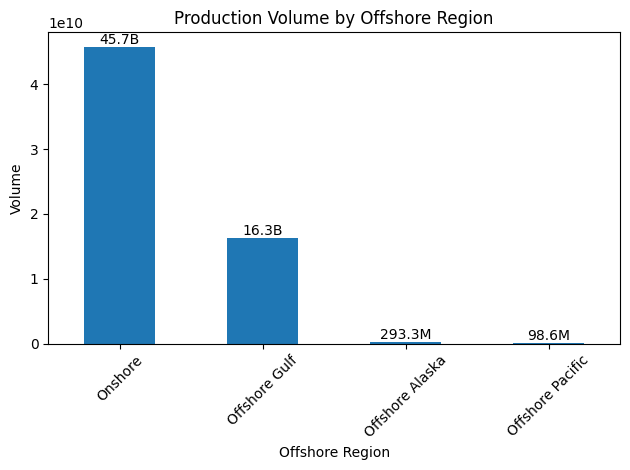

In [ ]:
# (number 7 plot graph): Which Offshore region is the most productive by volume?

ax = offshore_production.plot(kind='bar', rot=45)

ax.set_xlabel('Offshore Region')
ax.set_ylabel('Volume')
ax.set_title('Production Volume by Offshore Region')

# Add formatted value labels on top of bars
for i, value in enumerate(offshore_production.values):
    ax.text(i, value, format_large_number(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()
